In [1]:
import sys, os, time, shutil, random
from pathlib import Path
_cwd = os.getcwd()
os.chdir(Path(_cwd)/'..')
from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:98% !important; }</style>"))
# %load_ext autoreload
# %autoreload 2
# %pdb
from yaml import dump
import omnifig as fig
import numpy as np
np.set_printoptions(linewidth=120)
import pickle
from tabulate import tabulate
from tqdm import tqdm_notebook as tqdm
import torch
from torch import nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
# import torchvision.models
from torch.utils.data import Dataset, DataLoader, TensorDataset
import timm

%matplotlib notebook
import matplotlib.pyplot as plt
#plt.switch_backend('Qt5Agg') #('Qt5Agg')
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib import animation
import matplotlib as mpl
# mpl.rc('image', cmap='gray')
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize

# import gpumap
from c3linearize import linearize, class_graph

fig.initialize()

import omnilearn as learn
from omnilearn import models
from omnilearn import util
from omnilearn.data import InterventionSamplerBase

from sklearn.decomposition import PCA
import sklearn.datasets

fig.initialize('sae')
from omnifig.projects import sae
import networkx as nx

# from src import sample_full_interventions, response_mat, factor_reponses
dataset = None
src = None

In [2]:
device = 'cuda'
figure_dir = Path('../learn_rep/figures/responses')
figure_dir = None
seed = 10
torch.manual_seed(seed)

src = None

num_nodes = 5

B = 48
N = num_nodes + 3
G = 32
C = 3
H, W = 100, 100
# H, W = 64, 64

In [3]:
# dataset = fig.quick_run('load-data', name='3dshapes', mode='full', labeled=True, shuffle=False, seed=seed)
# len(dataset)

In [4]:
dataset = fig.quick_run('load-data', 'extra/angle')
len(dataset)

| dataset: [<class 'omnifig.config.ConfigDict'>]
| CREATING . (type=dataset) (mod={'selected': 1})
|  > accepted [dict with 1 item/s]
|  >  > (5): 5 [list with 9 item/s]
|  >  >  > (0): 3
|  >  >  > (1): 4
|  >  >  > (2): 5
|  >  >  > (3): 6
|  >  >  > (4): 7
|  >  >  > (5): 8
|  >  >  > (6): 9
|  >  >  > (7): 10
|  >  >  > (8): 11
|  > ordered: None (by default)
|  > unordered: None (by default)
|  > invert: False (by default)
|  > eval-name: 'extra' (by default)
|  > [Pushed] load-labels: True
|  > .num_workers: 0
|  > batch_size: 128
|  > shuffle: True
|  > drop_last: True
|  > .step_device --> .device: 'cuda'
|  > infinite: False (by default)
|  > extractor: None (by default)
|  > allow_batched: True (by default)
|  > split [dict with 1 item/s]
|  >  > (val): 0.1
|  > shuffle-split: True (by default)
|  > split-src: 'train' (by default)
|  > _dataset_type --> dataset-name --> name: '3dshapes'
|  > _dataset_mod: [] (by default)
|  > default_mode --> mode: 'train' (by default)
|  > m

207380

In [5]:
dataset._modes.keys()

dict_keys(['train', 'extra', 'val'])

In [11]:
dataset.switch_to('train')
len(dataset)

207380

In [7]:
dataset.switch_to('val')
len(dataset)

23042

In [8]:
dataset.switch_to('extra')
len(dataset)

153578

In [12]:
batch = dataset.get_batch(batch_size=64)
X, = batch
X.shape

torch.Size([64, 3, 64, 64])

<IPython.core.display.Javascript object>


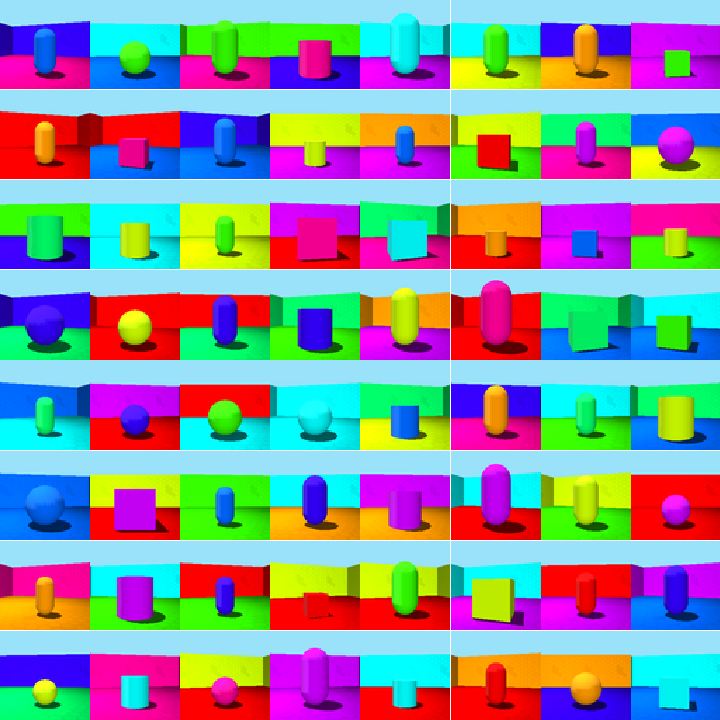

In [13]:
util.plot_imgs(X);